In [6]:
import pandas as pd
from datetime import datetime, date

In [8]:
# Đọc tập dữ liệu
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/working/Data_working.csv")
df = df.loc[:4653,:] 

In [10]:

# Exclude missing values and convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Get the earliest date by excluding missing values
earliest_date = df['Date'].dropna().min()

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    date = row['Date']
    # Check if the date value is missing (NaN)
    if pd.isnull(date):
        # Assign the earliest date to the missing value
        df.at[index, 'Date'] = earliest_date

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.head()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.290,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,NaN,NaN,NaN,NaN
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,...,2090.59,96.66,0.088890,0.51930,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70


In [14]:
df = df.sort_values('Date', ascending=True)

#df.head(20)

In [16]:
df_filled = df.fillna(method='ffill', axis=0)

In [18]:
print("Is There any 'NaN' value: ", df_filled.isnull().values.any())
print("Is there any duplicate value: ", df_filled.index.duplicated().any())

Is There any 'NaN' value:  True
Is there any duplicate value:  False


In [20]:
#df_filled

In [22]:
# Điền giá trị 0 vào các dữ liệu còn thiếu
df_filled_all = df_filled.fillna(0)

# Kiểm tra sự tồn tại của giá trị NaN trong DataFrame
print("Is There any 'NaN' value: ", df_filled_all.isnull().values.any())

# Kiểm tra sự tồn tại của giá trị trùng lặp trong DataFrame
print("Is there any duplicate value: ", df_filled_all.index.duplicated().any())


Is There any 'NaN' value:  False
Is there any duplicate value:  False


In [24]:
df_filled_all.head(20)

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
4653,2010-07-20,0.1,0.1,0.1,0.1,0.26,936.0,182.0,1090.745856,789700.0,...,0.0,0.0,0.0,0.0,1191.7,17.693,0.00,1083.48,10229.96,9300.46
4652,2010-07-21,0.1,0.1,0.1,0.1,0.58,784.0,182.0,603.821256,499964.0,...,0.0,0.0,0.0,0.0,1191.8,17.803,0.00,1069.59,10120.53,9278.83
4651,2010-07-22,0.1,0.1,0.1,0.1,2.16,594.0,182.0,572.443182,403000.0,...,0.0,0.0,0.0,0.0,1195.6,18.120,7002.75,1093.67,10322.30,9220.88
4650,2010-07-23,0.1,0.1,0.1,0.1,2.40,655.0,182.0,530.932990,412004.0,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4649,2010-07-24,0.1,0.1,0.1,0.1,0.50,959.0,182.0,1519.539683,1148772.0,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4648,2010-07-25,0.1,0.1,0.1,0.1,1.55,2130.0,182.0,3224.285714,2979240.0,...,0.0,0.0,0.0,0.0,1187.8,18.101,7018.25,1102.66,10424.62,9430.96
4647,2010-07-26,0.1,0.1,0.1,0.1,0.88,1250.0,182.0,1003.164609,975076.0,...,0.0,0.0,0.0,0.0,1183.1,18.200,7136.50,1115.01,10525.43,9503.66
4646,2010-07-27,0.1,0.1,0.1,0.1,3.37,775.0,241.0,764.108434,507368.0,...,0.0,0.0,0.0,0.0,1158.0,17.626,7044.50,1113.84,10537.69,9496.85
4645,2010-07-28,0.1,0.1,0.1,0.1,4.39,664.0,244.0,4922.289308,3130576.0,...,0.0,0.0,0.0,0.0,1160.4,17.441,7156.25,1106.13,10497.88,9496.85
4644,2010-07-29,0.1,0.1,0.1,0.1,8.06,534.0,244.0,1125.455556,810328.0,...,0.0,0.0,0.0,0.0,1171.2,17.617,7216.50,1101.53,10467.16,9496.85


In [26]:
data_sorted = df_filled_all.sort_values('Date', ascending = False)
data_sorted.head()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.290,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.5,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70


In [28]:
#data_sorted.to_csv("/Users/ibulmnie/Documents/GitHub/ML20222.PredictionBitcoin/working/saved_data.csv", index=False)

dữ liệu chúng ta lấy ETH xuất hiện từ 10/3 -> trễ vài tháng so với các kênh dữ liệu khác, nhưng mà thật ra chả ảnh hưởng nhiều

từ 6/3/2017 -> nay tất cả các cột đều full data

In [30]:
# Lọc dữ liệu từ ngày 20/07/2010 đến ngày 07/08/2015
start_date = pd.to_datetime('20/07/2010', dayfirst=True)
end_date = pd.to_datetime('10/03/2016', dayfirst=True)
filtered_df = df_filled.loc[(df_filled['Date'] >= start_date) & (df_filled['Date'] <= end_date)]

# In dữ liệu đã lọc
#filtered_df


In [31]:
# Lọc dữ liệu từ ngày 06/07/2017 đến ngày 16/04/2023
start_date = pd.to_datetime('06/07/2017', dayfirst=True)
end_date = pd.to_datetime('16/04/2023', dayfirst=True)
filtered_df_new = df_filled.loc[(df_filled['Date'] >= start_date) & (df_filled['Date'] <= end_date)]

# In dữ liệu đã lọc
filtered_df_new.tail()

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
4,2023-04-12,29886.4,30209.8,30473.0,29679.5,78.69,1056542.0,4.788780e+13,1933495.919,635037442.0,...,1916.58,92.02,0.083398,0.50473,2010.9,25.458,8916.5,4091.95,33647.22,28082.70
3,2023-04-13,30387.4,29892.4,30524.1,29864.5,65.87,1009669.0,4.788780e+13,1812112.549,567094231.0,...,2012.11,94.19,0.087344,0.51244,2041.3,25.925,9058.5,4146.22,34030.34,28156.97
2,2023-04-14,30472.5,30387.4,30964.9,30026.0,98.38,1016042.0,4.788780e+13,1759535.436,559166432.0,...,2099.98,96.34,0.088707,0.52269,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
1,2023-04-15,30299.6,30472.6,30586.5,30208.8,31.71,1045660.0,4.788780e+13,1839875.354,631025193.0,...,2090.59,96.66,0.088890,0.51930,2002.2,25.460,9023.5,4137.64,33885.31,28493.47
0,2023-04-16,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.290,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,9023.5,4137.64,33885.31,28493.47


In [32]:
print("Is There any 'NaN' value: ", filtered_df_new.isnull().values.any())
print("Is there any duplicate value: ", filtered_df_new.index.duplicated().any())

Is There any 'NaN' value:  False
Is there any duplicate value:  False


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_df = data_sorted.drop(["Date"], axis=1)[:-1]

normalized_data = scaler.fit_transform(data_df)

print(normalized_data)

[[0.44885514 0.44868545 0.44274502 ... 0.82425707 0.8913121  0.90330425]
 [0.44869668 0.45125325 0.4433422  ... 0.82425707 0.8913121  0.90330425]
 [0.45125711 0.44999156 0.44882701 ... 0.82425707 0.8913121  0.90330425]
 ...
 [0.         0.         0.         ... 0.0147866  0.01636506 0.05646135]
 [0.         0.         0.         ... 0.01238885 0.01254912 0.04712864]
 [0.         0.         0.         ... 0.00596638 0.00502427 0.04970304]]


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_data, data_df['BTC_close'], test_size=0.15, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Dự đoán giá trị
y_pred = model.predict(X_test)

# Đánh giá hiệu suất
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

2229.9711021132944
0.9999895102394206


<Axes: xlabel='BTC_close'>

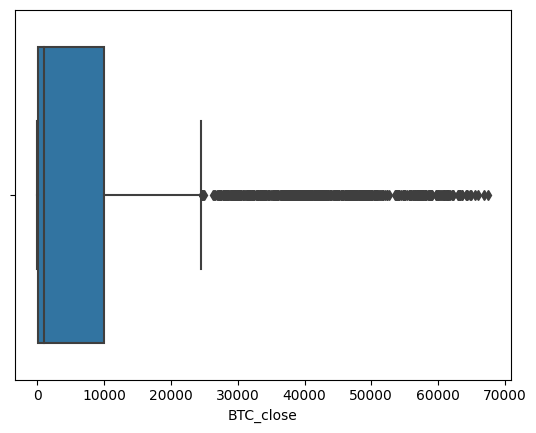

In [47]:
import seaborn as sns
sns.boxplot(x=data_df['BTC_close'])

In [38]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data_df['BTC_close'])
threshold = 3
outliers = np.where(z_scores > threshold)
print("Giá trị ngoại lai:", data_df['BTC_close'].iloc[outliers])

Giá trị ngoại lai: 499    53631.5
500    56496.0
501    57210.3
502    56882.9
503    57794.8
        ...   
768    54879.0
783    54111.8
784    57433.8
785    55923.7
786    55906.6
Name: BTC_close, Length: 122, dtype: float64


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Tách feature và label
features = data_df.drop(['BTC_close'], axis=1)
labels = np.where(z_scores > threshold, 1, 0)

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình Random Forest
model = RandomForestClassifier()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá kết quả dự đoán
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       906
           1       1.00      0.96      0.98        25

    accuracy                           1.00       931
   macro avg       1.00      0.98      0.99       931
weighted avg       1.00      1.00      1.00       931

